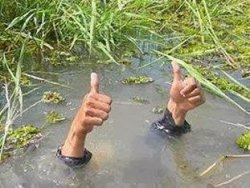

In this notebook you will find:
- EDA on the initial features
- EDA on synthesized statistical features
- BaseLine ML pipeline(s)
- Realization of the simplest crosvalidation(CV)
- Comparison of models out of the box(without hyperparametrs).
- Building Stacked ensemble for final model

In this notebook you will not find:
- Working with Hyperparameters of Models
- Working with anomalies in features

*There will be some commented parts, still working on this*

[Referece](https://www.kaggle.com/competitions/playground-series-s4e5/)

# 1. Main Imports

In [1]:
# main 
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# viz
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
cmap = sns.color_palette("ch:s=.75,rot=-0.6",as_cmap=True)

from colorama import Fore, Style

# deal with warnings
import warnings
warnings.filterwarnings("ignore")

# 2. Load Data

In [2]:
# set path
path = '/kaggle/input/playground-series-s4e5'
# load data
train = pd.read_csv(f'{path}/train.csv', index_col=0)
test = pd.read_csv(f'{path}/test.csv', index_col=0)

cols = train.columns

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null  int6

No missing data

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000
Encroachments,1117957.0,4.949230,2.083324,0.000,4.00,5.000,6.00,18.000


In [5]:
train_target = train['FloodProbability'].copy()
train_features = train.drop(columns=['FloodProbability'])

# 3. Exploratory analysis

## Looking closely into initial data

The distribution of features is close to normal, as said [here](https://www.kaggle.com/competitions/playground-series-s4e5/discussion/499244) it is a Poison distribution


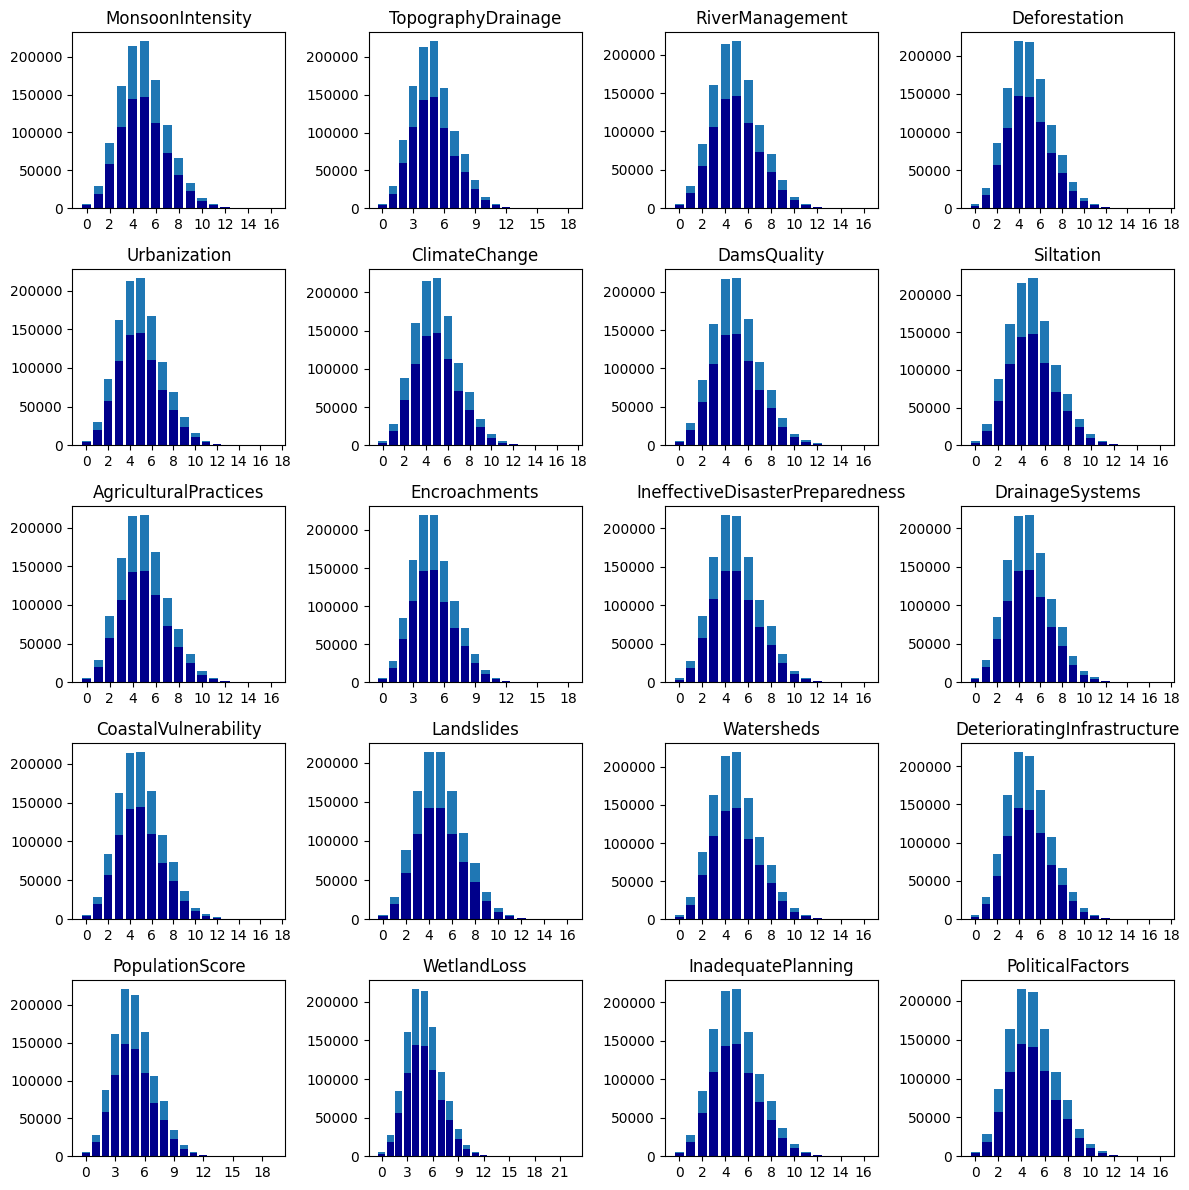

In [6]:
from matplotlib.ticker import MaxNLocator

_, axs = plt.subplots(5, 4, figsize=(12, 12))

for col, ax in zip(train_features.columns, axs.reshape(-1)):
    train_count = train[col].value_counts()
    ax.bar(train_count.index, train_count)
    test_count = test[col].value_counts()
    ax.bar(test_count.index, test_count, color='darkblue')
    ax.set_title(col)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
plt.tight_layout()
plt.show()

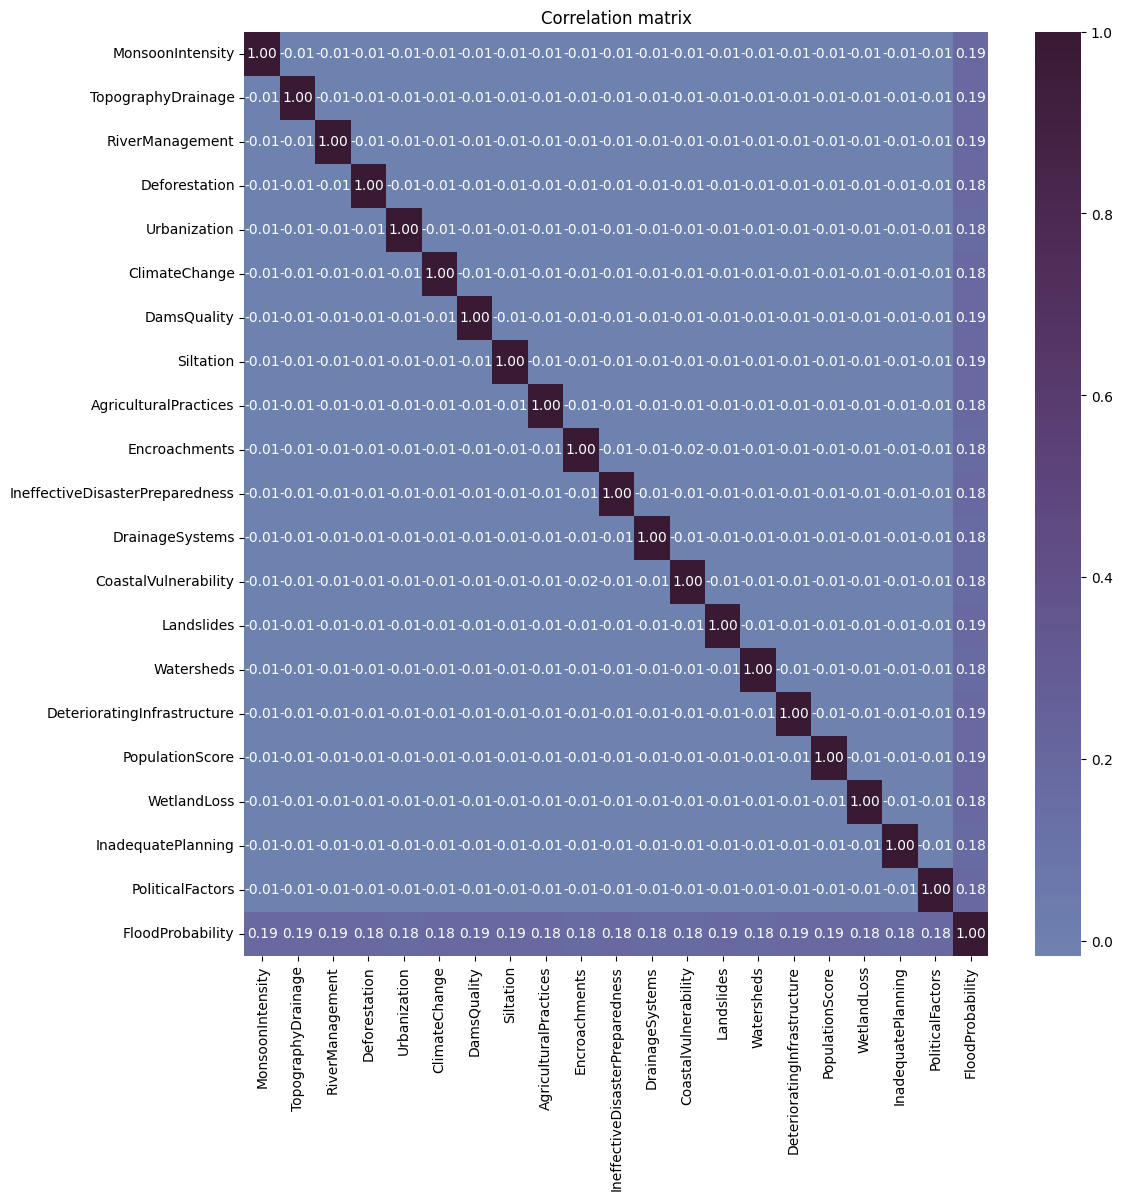

In [7]:
corr = np.corrcoef(train, rowvar=False)
plt.figure(figsize=(12, 12))
sns.heatmap(corr, center=0, cmap=cmap, annot=True, fmt='.2f',
            xticklabels=train.columns, yticklabels=train.columns)
plt.title('Correlation matrix')
plt.show()

- correlations between features is insignificant
- all of the features have some effect on target 

## Target stat

[]

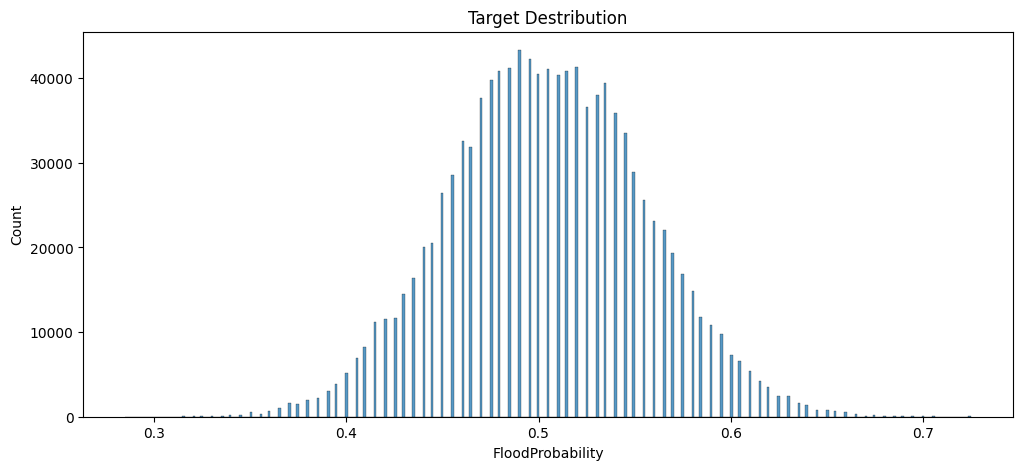

In [8]:
plt.figure(figsize=(12, 5))
plt.title('Target Destribution')
sns.histplot(train.FloodProbability)
plt.plot()

In [9]:
# realy whould like to try remake regression task into classification (craizy?)...
target_set = train_target.unique()
n_bins = target_set.shape[0]
target_min, target_max = min(target_set), max(target_set)
print (f'bins: {Fore.CYAN}{n_bins}{Fore.RESET}')
print (f'left_most: {Fore.CYAN}{target_min}{Fore.RESET}')
print (f'right_most: {Fore.CYAN}{target_max}{Fore.RESET}')

bins: 83
left_most: 0.285
right_most: 0.725


 # 4. EDA New Features

## New Feature Engeneering

In [10]:
def stat_features(data=train_features, only_stat=False):
    """
    A lot of statistic features
    """
    df = data.copy()
    cols = df.columns
    
    df['sum'] = df[cols].sum(axis=1) 
    # df['mean'] = df[cols].mean(axis=1) # Same info as mean 1 corr
    df['std'] = df[cols].std(axis=1)
    df['median'] = df[cols].median(axis=1)
    df['min_all'] = df[cols].min(axis=1)
    df['max_all'] = df[cols].max(axis=1)
    df['ptp'] = df[cols].values.ptp(axis=1)
    df['q25'] = df[cols].quantile(0.25, axis=1)
    df['q75'] = df[cols].quantile(0.75, axis=1)
    
    if only_stat:
        df = df.drop(columns=cols)
        
    return df

In [11]:
train_features_with_stat = stat_features()
train_features_stat_only = stat_features(only_stat=True)

## init eda

In [12]:
# creating new corr matrix
new_train = pd.concat([train_features_stat_only, train_target], axis=1)
new_train

,sum,std,median,min_all,max_all,ptp,q25,q75,FloodProbability
id,,,,,,,,,
0,94,1.750188,4.5,2,8,6,3.00,5.25,0.445
1,94,2.296450,4.0,0,9,9,3.00,6.25,0.450
2,99,1.932411,5.0,1,8,7,3.00,6.25,0.530
3,104,1.641565,5.0,2,8,6,4.00,6.25,0.535
4,72,1.500877,3.0,1,6,5,2.75,5.00,0.415
...,...,...,...,...,...,...,...,...,...
1117952,99,2.543826,4.0,1,10,9,3.00,7.00,0.495
1117953,96,2.419221,4.0,1,9,8,3.00,5.50,0.480
1117954,98,1.970840,5.0,1,9,8,4.00,5.25,0.485


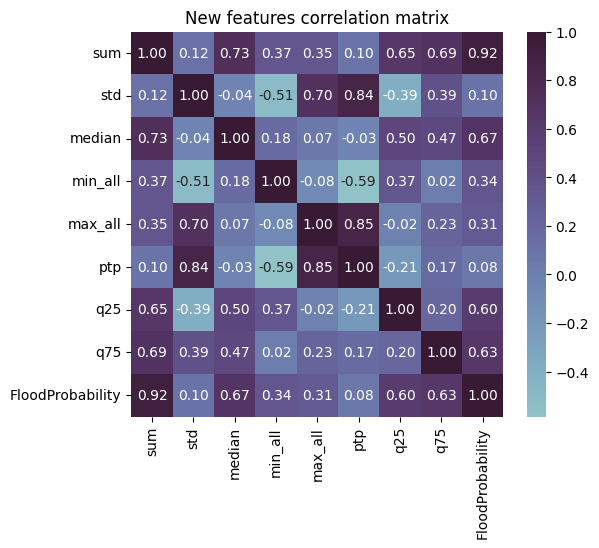

In [13]:
cc2 = np.corrcoef(new_train, rowvar=False)
plt.figure(figsize=(6, 5))
sns.heatmap(cc2, center=0, cmap=cmap, annot=True, fmt='.2f',
            xticklabels=new_train.columns, yticklabels=new_train.columns)
plt.title('New features correlation matrix')
plt.show()

- The data obtained in the process of statistical analysis are highly correlated with the target. 
- It is possible to note a significant influence "sum of features" on target.

### scatter plots

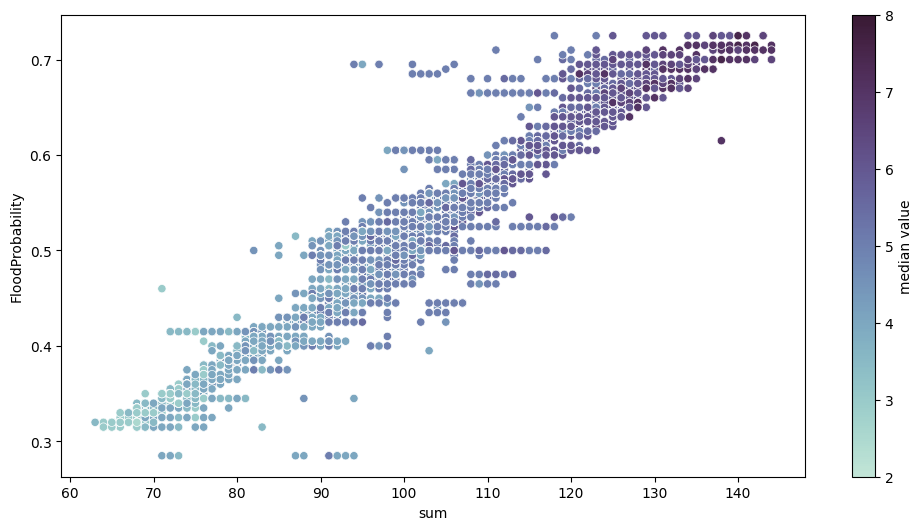

In [14]:
plt.figure(figsize=(12, 6))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(new_train, x='sum', y='FloodProbability', hue='median', hue_norm=sm.norm, palette=cmap, legend=False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('median value')

plt.show()

Most interesting graph, here we can see a lot of outliers when FloodProb is high

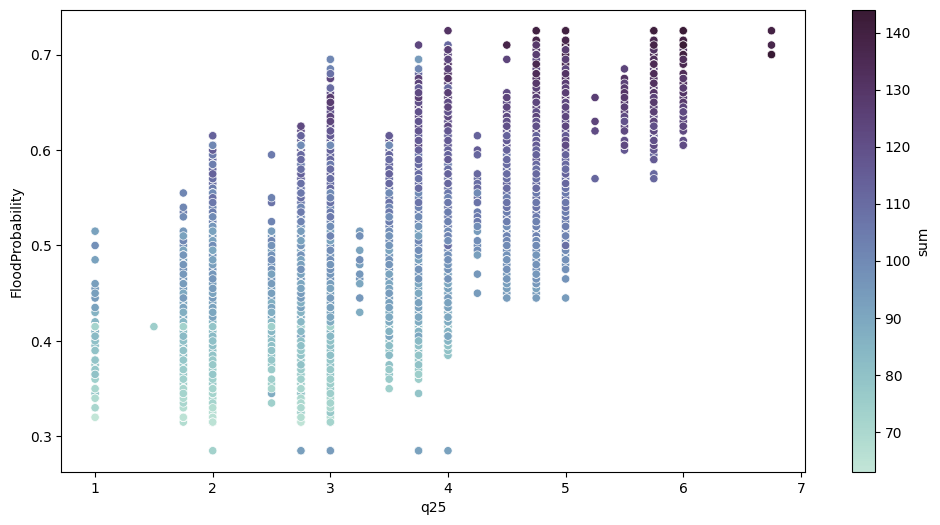

In [15]:
plt.figure(figsize=(12, 6))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(new_train, x='q25', y='FloodProbability', hue='sum', hue_norm=sm.norm, palette=cmap, legend=False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('sum')

plt.show()

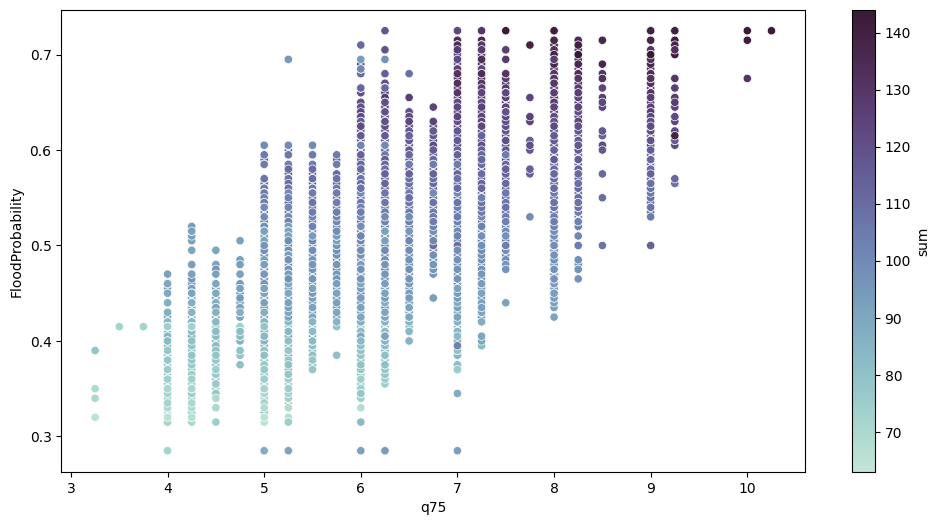

In [16]:
plt.figure(figsize=(12, 6))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize())
scatter = sns.scatterplot(new_train, x='q75', y='FloodProbability', hue='sum', hue_norm=sm.norm, palette=cmap, legend=False);
cbar = plt.colorbar(sm, ax = plt.gca())
cbar.set_label('sum')

plt.show()

## Sum plots
Eda new features

In [17]:
def analisys_grouped(
    df=new_train, # must include target as well
    feature='sum',
    target='FloodProbability',
    func_grouper=['mean', 'median'],
    func_destribution='count'
): 
    main_data = list()
    
    for idx, func in enumerate(func_grouper): 
        main_data.append(df.groupby([feature])[target].agg(func))
        
    destribution = df.groupby([feature])[target].agg(func_destribution)
    
    step_size = df[feature].diff().min()
    if pd.isnull(step_size):
        step_size = 0.1
    
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 3]}, sharex=True)

    fig.suptitle(f'Gouped {feature} to target characteristic', fontsize=12)
    # main graph
    for md in main_data:
        sns.scatterplot(x=md.index, 
                        y=md, 
                        s=10)
    # distr
    width = step_size * 0.01
    axs[0].bar(destribution.index, destribution, width=width)
    
    
    axs[0].set_ylabel(f'{feature}_{func_destribution}', rotation=90, va='center')
    axs[1].legend([f'{func} of {feature}s' for func in func_grouper])
    plt.tight_layout()
    plt.show()

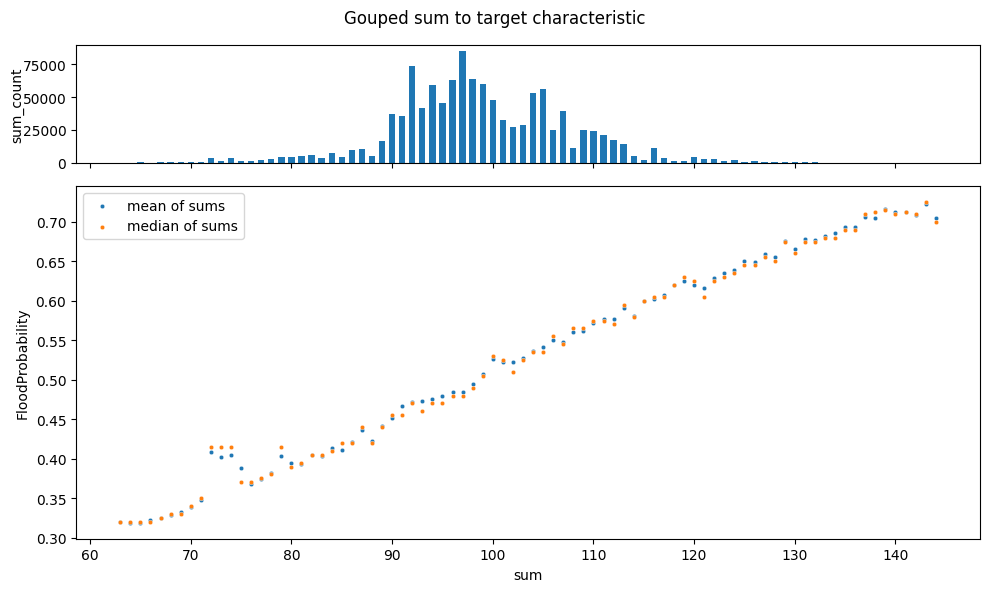

In [18]:
analisys_grouped()

- 72-74 (79 same)
- sum>138

n.b high corr so it is important

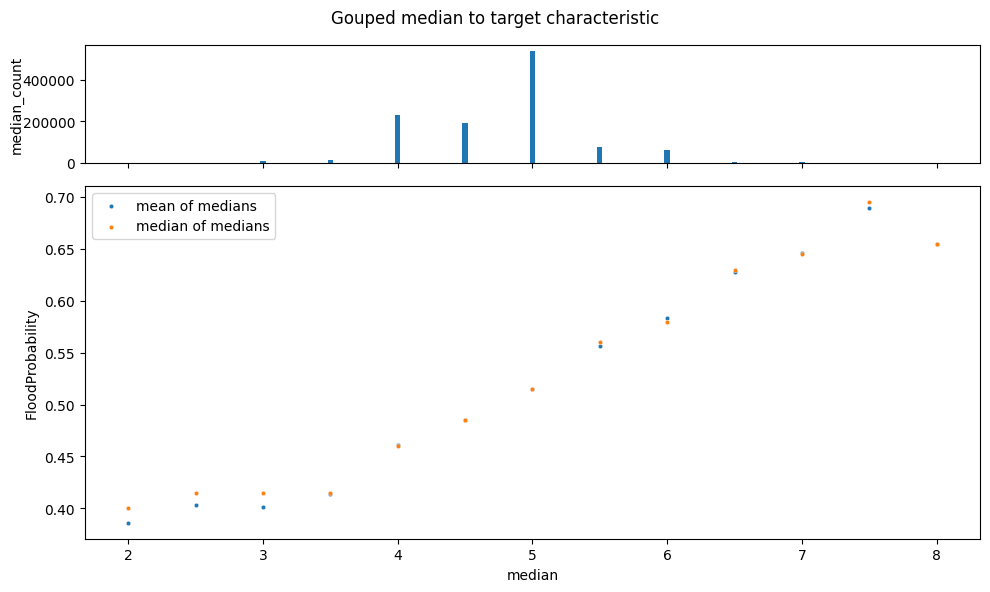

In [19]:
analisys_grouped(feature='median')

flat < 3.5

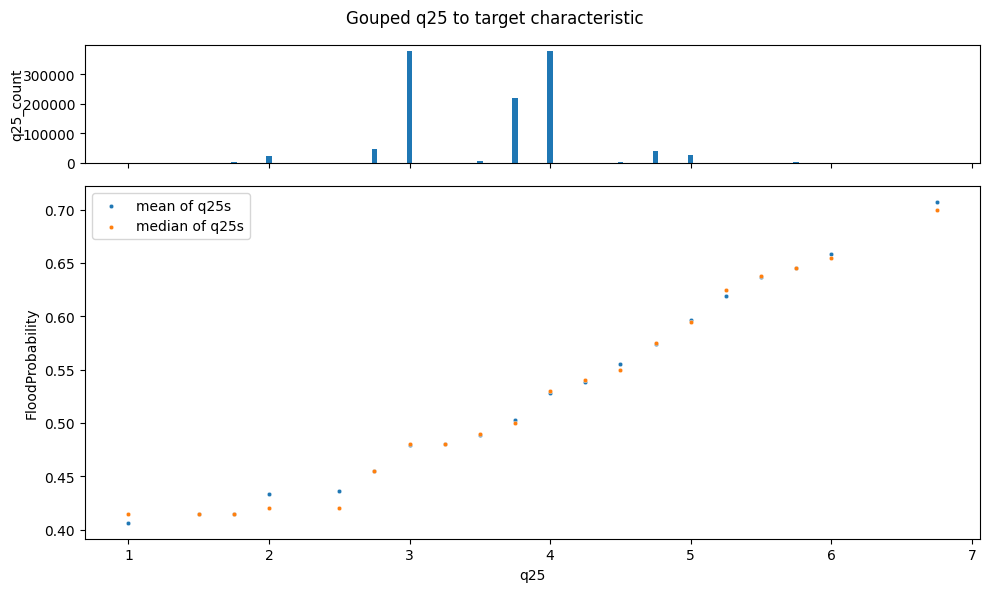

In [20]:
analisys_grouped(feature='q25')

flat < 2.5

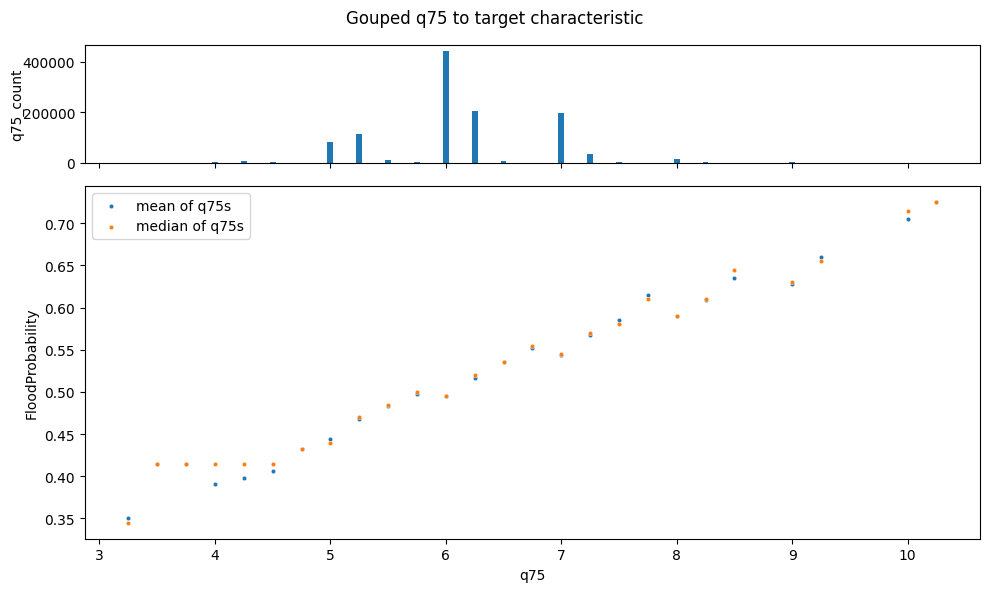

In [21]:
analisys_grouped(feature='q75')

flat < 4.5

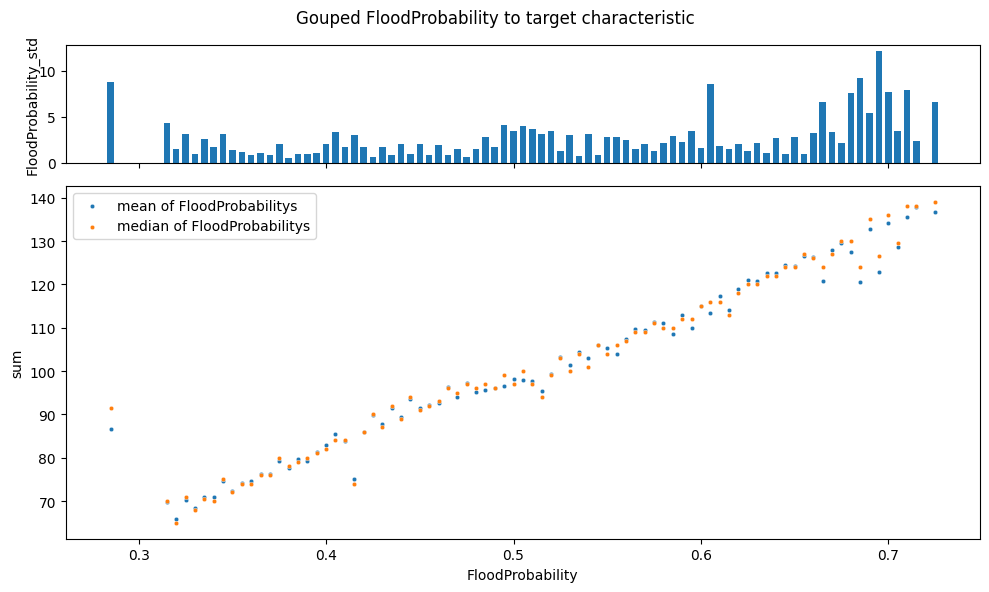

In [22]:
# swaped
analisys_grouped(feature='FloodProbability', target='sum', func_destribution='std')

outliers <0.3 FloodProb

- target values <0.3 outliers and have to be filterd on train stage
- target values [0.675 ;0.725] with high std of sums(unstable) need further analysis, maybe somehow impliment rbf-kernel(proof me wrong in a coments, still learning) 

Synth features:
- q25 < 2.5
- q75 < 4.5
- median < 3.5
- sum 72-74 78; >138

# 5. Models CrossValidating + pipelines

Dev universal cross validation func 

In [23]:
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.metrics import r2_score

# from tqdm import tqdm

folds = KFold(n_splits=5, shuffle=True, random_state=42) # folds are static

avg_scores = pd.Series()


def cross_validate(pipeline,
                   X=train_features, 
                   y=train_target.to_frame(), 
                   score=r2_score,
                   model_name='default',
                   early_stop=None,
                  ):
    """
        Cross Validating pipelines | in development

        Parameters
        ----------
        pipeline : sklearn.pipeline.Pipeline
            model to CV
        X : DataFrame 
            Features
        y : DataFrame 
            Target
        score : sklearn.metrics
            Scoring 
        early_stop : None | int
            № of iteration to make it stop
    """
    
    if model_name=='default':
        # implement regular exp
        model_name = pipeline[-1].__str__() 
    
    print(f'{Fore.BLUE}Model: {model_name}{Fore.RESET}')
    
    scores = []
    
    for fold, (idx_train, idx_val) in enumerate(folds.split(train)):

        # Init folds
        X_train = X.iloc[idx_train]
        X_val = X.iloc[idx_val]
        y_train = y.iloc[idx_train]
        y_val = y.iloc[idx_val]

        # Empty predictions 
        y_pred = np.zeros_like(y_val, dtype=float)

        model = clone(pipeline)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        # get scores
        print(f'  - cross_val{fold}; {score.__str__().split()[1]}={score(y_val, y_pred)}')

        scores.append(score(y_val, y_pred))
        
        if early_stop is not None and fold >= early_stop:
            break
            
    # will think how avoid this later
    # + std's 
    global avg_scores
    avg_scores[model_name] = np.mean(scores)
    
    print(f'{Fore.CYAN}Avarage score: {np.mean(scores)}', end='\n\n')

## Creating pipline

I personally believe that every solution should have pipelines.

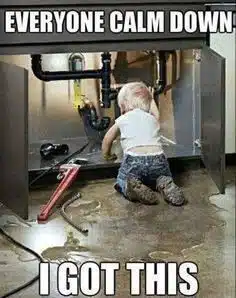!

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class AnomalyToCategory(BaseEstimator, TransformerMixin):
    def __init__(self, special_ranges=[], more_eq_than=None, less_eq_than=None):
        self.special_ranges = special_ranges
        self.more_eq_than = more_eq_than
        self.less_eq_than = less_eq_than
        
    def fit(self, X, y=None):
        X = check_array(X)
        self.mask = np.zeros_like(X, dtype=bool)
        self.n_features_in_ = X.shape[1]
        self.feature_names_in_ = [f'default{i}' for i in range(self.n_features_in_)]
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = X.columns
        return self
    
    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        # more or eq
        if self.more_eq_than is not None:
            self.mask |= X >= self.more_eq_than
                                      
        # less or eq
        if self.less_eq_than is not None:
            self.mask |= X <= self.less_eq_than
        
        # ranges
        if self.special_ranges:
            for dr in self.special_ranges:
                # assert len(dr)!=2, 'range should contain list with 2 nums'
                self.mask |= (X >= dr[0]) & (X <= dr[1])
                
        return self.mask
    
    def get_feature_names_out(self, feature_names=None):
        return ['anomaly']

In [25]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

# imputers for generalization

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

# will work with some data as cat in future
default_cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(handle_unknown="ignore"))

sqrt_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.sqrt, feature_names_out="one-to-one"),
    StandardScaler())


preprocessing_baseline = make_column_transformer(
    (default_num_pipeline, make_column_selector(dtype_include=np.number)),
    (default_cat_pipeline, make_column_selector(dtype_include=object)),
)

# Numeric pipeline for generalization
numeric_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

# Anomaly transformers
sum1_anomaly = AnomalyToCategory(special_ranges=[[72, 74]])
sum2_anomaly = AnomalyToCategory(more_eq_than=138)
q25_anomaly = AnomalyToCategory(less_eq_than=2.5)
q75_anomaly = AnomalyToCategory(less_eq_than=4.5)
median_anomaly = AnomalyToCategory(less_eq_than=3.5)

# Numeric features to apply default pipeline
numeric_features = train_features_stat_only.columns.to_list()

# Column transformer
preprocessing = ColumnTransformer([
    ("numeric", numeric_pipeline, numeric_features),
    ("sum1_anomaly", sum1_anomaly, ['sum']),
    ("sum2_anomaly", sum2_anomaly, ['sum']),
    ("q25_anomaly", q25_anomaly, ['q25']),
    ("q75_anomaly", q75_anomaly, ['q75']),
    ("median_anomaly", median_anomaly, ['median']),
    ("min_sqrt", sqrt_pipeline, ['min_all']),
])

# Preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ("preprocessing", preprocessing)
])

this notebook will not contain anomalies

## Model analisys on default pipeline

No hyperparameters, just an evaluation of the performance of the models from the box. 

Fast CrossVal analisys, only one fold

In [26]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import HistGradientBoostingRegressor as HGB
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# probably should write one function for that.. but nwm

# LinReg
model = make_pipeline(preprocessing_baseline,
                      LinearRegression())

cross_validate(model,
               model_name='LinReg_original',
               early_stop=0)

cross_validate(model,
               X=train_features_with_stat,
               model_name='LinReg_with_stats',
               early_stop=0)

cross_validate(model,
               X=train_features_stat_only,
               model_name='LinReg_stats_only',
               early_stop=0
               )

# RidgeReg
model = make_pipeline(preprocessing_baseline,
                      PolynomialFeatures(degree=2),
                      Ridge())
cross_validate(model,
               model_name='RidgeReg3_original',
               early_stop=0)

cross_validate(model,
               X=train_features_with_stat,
               model_name='RidgeReg3_with_stats',
               early_stop=0)

cross_validate(model,
               X=train_features_stat_only,
               model_name='RidgeReg3_stats_only',
               early_stop=0
               )


# CatBoost
model = make_pipeline(preprocessing_baseline,
                      CatBoostRegressor(verbose=0))
cross_validate(model,
               model_name='CatBoost_original',
               early_stop=0)

cross_validate(model,
               X=train_features_with_stat,
               model_name='CatBoost_with_stats',
               early_stop=0)

cross_validate(model,
               X=train_features_stat_only,
               model_name='CatBoost_stats_only',
               early_stop=0
               )


# XGBoost
model = make_pipeline(preprocessing_baseline,
                      XGBRegressor(verbose=0))
cross_validate(model,
               model_name='XGBoost_original',
               early_stop=0)
cross_validate(model,
               X=train_features_with_stat,
               model_name='XGBoost_with_stats',
               early_stop=0)

cross_validate(model,
               X=train_features_stat_only,
               model_name='XGBoost_stats_only',
               early_stop=0
               )

# LGBM
model = make_pipeline(preprocessing_baseline,
                      LGBMRegressor(verbose=0))
cross_validate(model,
               model_name='LGBM_original',
               early_stop=0)
cross_validate(model,
               X=train_features_with_stat,
               model_name='LGBM_with_stats',
               early_stop=0)

cross_validate(model,
               X=train_features_stat_only,
               model_name='LGBM_stats_only',
               early_stop=0
               )

# HGB (should perform well coz int features)
model = make_pipeline(preprocessing_baseline,
                      HGB(verbose=0))
cross_validate(model,
               model_name='HGB_original',
               early_stop=0)
cross_validate(model,
               X=train_features_with_stat,
               model_name='HGB_with_stats',
               early_stop=0)

cross_validate(model,
               X=train_features_stat_only,
               model_name='HGB_stats_only',
               early_stop=0
               )

Model: LinReg_original
  - cross_val0; r2_score=0.8448773362840329
Avarage score: 0.8448773362840329

Model: LinReg_with_stats
  - cross_val0; r2_score=0.8450328437717558
Avarage score: 0.8450328437717558

Model: LinReg_stats_only
  - cross_val0; r2_score=0.845018228683422
Avarage score: 0.845018228683422

Model: RidgeReg3_original
  - cross_val0; r2_score=0.8454150752241287
Avarage score: 0.8454150752241287

Model: RidgeReg3_with_stats
  - cross_val0; r2_score=0.8456667949034127
Avarage score: 0.8456667949034127

Model: RidgeReg3_stats_only
  - cross_val0; r2_score=0.8456665144537142
Avarage score: 0.8456665144537142

Model: CatBoost_original
  - cross_val0; r2_score=0.8461100738507399
Avarage score: 0.8461100738507399

Model: CatBoost_with_stats
  - cross_val0; r2_score=0.8686854294166251
Avarage score: 0.8686854294166251

Model: CatBoost_stats_only
  - cross_val0; r2_score=0.8689237911753294
Avarage score: 0.8689237911753294

Model: XGBoost_original
  - cross_val0; r2_score=0.809066

### Model CV Scoring

In [27]:
def score_to_df(avg_scores=avg_scores):
    """fust df from stats creating"""
    splits_data = [idx.split('_')[1:] for idx in avg_scores.index]
    data = list(map('_'.join, splits_data))
    
    palette = sns.color_palette()
    cmap = dict()
    
    for d, color in zip(set(data), palette):
        cmap[d] = color
        
    scores = pd.DataFrame({'model_name': avg_scores.index,
                           'r2_score': avg_scores.values,
                           'data': data,
                           'color': [cmap[d] for d in data]
                          })
    return scores



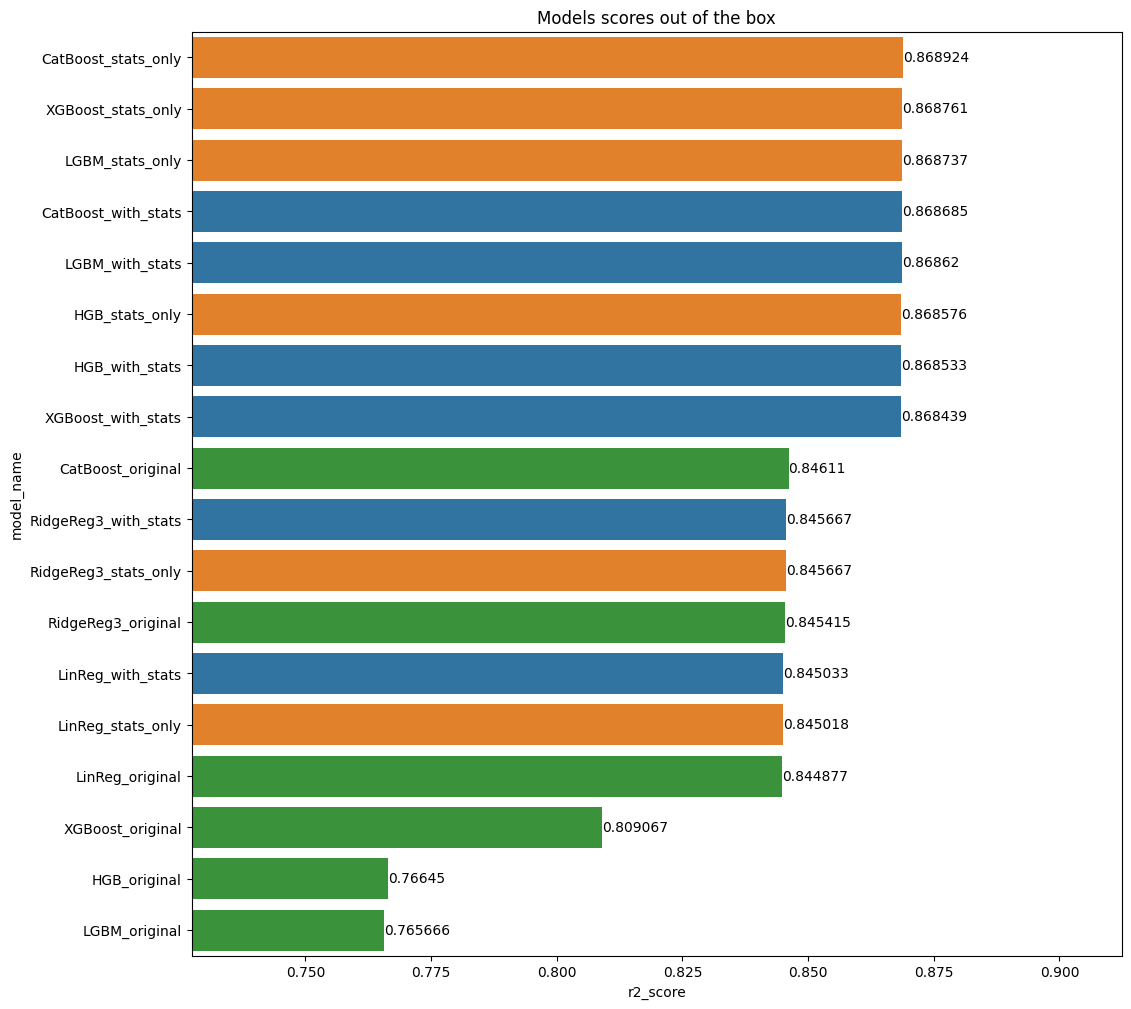

In [28]:
ans = score_to_df()
ans = ans.sort_values(by='r2_score', ascending=False)

_, ax = plt.subplots(1, 1, figsize=(12, 12))
plt.title('Models scores out of the box')

sns.barplot(data=ans, x='r2_score', y='model_name', palette=ans['color'].values)

ax.bar_label(ax.containers[0], fontsize=10)
ax.set_xlim(min(ans['r2_score'])*0.95, max(ans['r2_score'])*1.05)

plt.show()

# 6. StackReg + Submit

In [29]:
train_clean = train.query('FloodProbability >= 0.3')
# train_clean = train.copy()
train_droped_features = train_clean.drop(columns=['FloodProbability'])
y_train = train_clean[['FloodProbability']]

Base cat pipeline (stats_only r2=0.86900 on test)

In [30]:
# model = make_pipeline(preprocessing_baseline,
#                        CatBoostRegressor(verbose=0))

In [31]:
# X_train = stat_features(train_droped_features, only_stat=True)
# # integrate pipeline!
# X_train = pd.DataFrame(preprocessing.fit_transform(X_train),
#              columns = preprocessing.get_feature_names_out())



# X_test = stat_features(test, only_stat=True)
# # integrate pipeline!
# X_test = pd.DataFrame(preprocessing.fit_transform(X_test),
#              columns = preprocessing.get_feature_names_out())

## Stacked model

In [32]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

stacked = StackingRegressor(
    estimators=[
        ('cat', CatBoostRegressor(random_state=1, 
                                  verbose=0)),
        ('xgb', XGBRegressor(random_state=2,
                            verbose=0)),
        ('lgbm', LGBMRegressor(random_state=3,
                              verbose=0)),
        ('hgb', HGB(random_state=4))
    ],
    final_estimator=RandomForestRegressor(random_state=0),
)

model = make_pipeline(preprocessing_baseline,
                     stacked)

model.fit(train_droped_features, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7db6e10a70d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_freq...
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=2, ...)),
                                               ('lgbm',
                                                LGBMRegressor(random_state=3,
                                                              verbose=0)),
                                               ('hgb',
                                                HistGradientBoostingRegressor(random_state=4))],
                                   final_estimator=RandomForestRegressor(random_state=0)))])

In [33]:
test_pred = model.predict(test)

sub = pd.DataFrame({train_target.name: test_pred},
             index=test.index)

In [34]:
sub

,FloodProbability
id,
1117957,0.57865
1117958,0.44230
1117959,0.44190
1117960,0.47880
1117961,0.48145
...,...
1863257,0.48115
1863258,0.43950
1863259,0.62205


In [35]:
MAKE_SUBMISSION = True

if MAKE_SUBMISSION:
    sub.to_csv('submission.csv', index=True)

In [36]:
# # make floats to binned floats
# vals = y_train.sort_values(by='FloodProbability').values
# uniques = np.unique(vals)
# idx = (np.abs(sub.values - uniques)).argmin(axis=1)

# sub2 = pd.DataFrame({train_target.name: uniques[idx]},
#              index=test.index)

# MAKE_SUBMISSION = True

# if MAKE_SUBMISSION:
#     sub2.to_csv('submission.csv', index=True)